Sherpa Quick Start
==========

This tutorial shows some basic Sherpa features. More information on Sherpa can be
found in the [Sherpa documentation](https://sherpa.readthedocs.io/).

Workflow:
 - create synthetic data: a parabola with noise and error bars
 - load data in Sherpa
 - plot data using matplotlib
 - set, inspect, edit a model to fit the data
 - fit the data
 - compute the confidence intervals for the parameters
 - explore the parameter space

First of all, let's activate the inline matplotlib mode. Sherpa seamlessly uses matplotlib to provide immediate visual feedback to the user. Support for matplotlib in Sherpa requires the matplotlib package to be installed.

In [1]:
%matplotlib inline

Now, let's create a simple synthetic dataset, using numpy: a parabola between x=-5 and x=5, with some randomly generated noise (the form for `y` is chosen to match the model selected in step 6 below to fit the data, and the random seed used by NumPy is set to make this notebook repeatable):

In [2]:
import numpy as np
np.random.seed(824842)

x = np.arange(-5, 5.1)

c0_true = 23.2
c1_true = 0
c2_true = 1

y = c2_true * x*x + c1_true * x + c0_true + np.random.normal(size=x.size)
e = np.ones(x.size)

Let's import Sherpa:

In [3]:
from sherpa.astro import ui as sherpa

Depending on how you installed Sherpa, certain special features may be enabled or disabled. Sherpa prints some warning messages when it cannot find some of its modules, as shown above. These warnings are benign. You can refer to the Sherpa documentation to find out what additional features you can enable in Sherpa and how to enable them.

Let's load and plot the data we just created. Notice we are assigning the ID `mydata` to the dataset we are loading. We will use this ID to refer to the same dataset in the rest of the tutorial. Sherpa can deal with multiple datasets, fit them simultaneously with the same model, and even link parameters between models. Sherpa can read ASCII table and FITS files (provided the `astropy` package is installed).

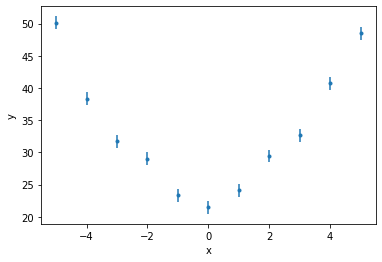

In [4]:
sherpa.load_arrays("mydata", x, y, e)
sherpa.plot_data("mydata")

We can set the model we want to fit to the data using the `set_model` call. There are different ways to instantiate the models: in this case, we just use the string `polynom1d` to refer to a 1D polynomial. The name of the model will be `poly`, and will be accessible as a Python variable. One can use more object oriented patterns to access and instantiate built-in models. Also, new models can be added by the user as Python functions or from tabular data.

In [5]:
sherpa.set_model("mydata", "polynom1d.poly")

Several Sherpa commands can be used to inspect the model. In this case we just use a simple `print` to get a summary of the model and its components.

In [6]:
print(poly)

polynom1d.poly
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   poly.c0      thawed            1 -3.40282e+38  3.40282e+38           
   poly.c1      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c2      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c3      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c4      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c5      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c6      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c7      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c8      frozen            0 -3.40282e+38  3.40282e+38           
   poly.offset  frozen            0 -3.40282e+38  3.40282e+38           


By default, only the first component (the intercept) is __thawed__, i.e. is free to vary in the fit. This corresponds to a constant function. In order to fit a parabola, we need to __thaw__ the coefficients of the first two orders in the polynomial, as shown below.

In [7]:
sherpa.thaw(poly.c1, poly.c2)

We are going to fit the dataset using the default settings. However, Sherpa has a number of optimization algorithms, each configurable by the user, and a number of statistics that can be used to take into account the error and other characteristics of data being fitted.

In [8]:
sherpa.fit("mydata")

Dataset               = mydata
Method                = levmar
Statistic             = chi2
Initial fit statistic = 12642.8
Final fit statistic   = 15.643 at function evaluation 8
Data points           = 11
Degrees of freedom    = 8
Probability [Q-value] = 0.0477837
Reduced statistic     = 1.95538
Change in statistic   = 12627.2
   poly.c0        23.1367      +/- 0.455477    
   poly.c1        0.0537585    +/- 0.0953463   
   poly.c2        1.04602      +/- 0.0341394   


Notice that Sherpa used a Levemberg Marquadt minimization strategy, and the $\chi^2$ error function. 
The best fit values of the parameters $c_0=23.1, c_1=0.05, c_2=1.05$ are close to the ones defined when we generated the dataset, i.e. ${\rm c0\_true} = 23.2$, ${\rm c1\_true} = 0$, ${\rm c2\_true} = 1$. 

In order to get immediate feedback of the fit results, we can plot the fit and the residuals. Again, Sherpa facilitates the creation of the plots, but users can harvest the power of matplotlib directly if they want to.

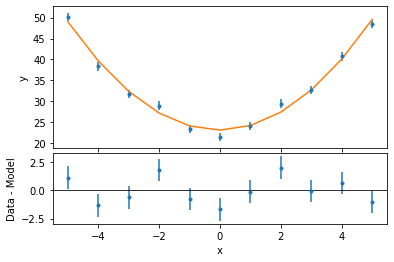

In [9]:
sherpa.plot_fit_resid("mydata")

We can now compute the confidence intervals for the free parameters in the fit:

In [10]:
sherpa.conf("mydata")

poly.c0 lower bound:	-0.455477
poly.c0 upper bound:	0.455477
poly.c1 lower bound:	-0.0953463
poly.c2 lower bound:	-0.0341394
poly.c1 upper bound:	0.0953463
poly.c2 upper bound:	0.0341394
Dataset               = mydata
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   poly.c0           23.1367    -0.455477     0.455477
   poly.c1         0.0537585   -0.0953463    0.0953463
   poly.c2           1.04602   -0.0341394    0.0341394


Sherpa allows to inspect the parameter space. In the cell below we ask sherpa to show us the projection of the confidence regions for the `c0` and `c1` parameters. The contours are configurable by the user: by default they show the confidence curves at 1, 2, and 3 $\sigma$

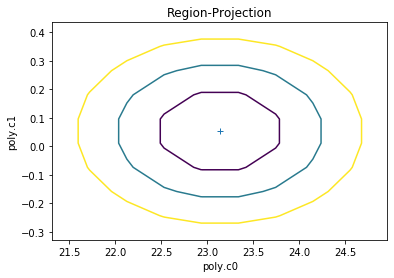

In [11]:
sherpa.reg_proj(poly.c0, poly.c1)

We can also directlty inspect the parameter space. For instance, in the plot below Sherpa displays the Interval Projection of the `c0` parameter, i.e. a plot of the error for each value of the parameter, around the minimum found by the optimization method during the fit.

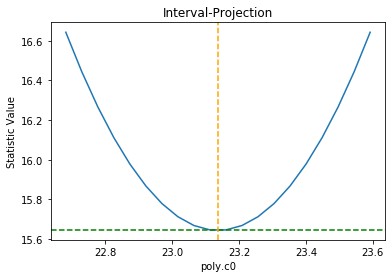

In [12]:
sherpa.int_proj(poly.c0)